### **图像连通域统计**

* 虽然cv.connectedComponents()函数可以实现图像中多个连通域的统计，但是只能通过标签将不同连通域分开，无法统计更多的信息，但有时我们希望得到**每个连通域的中心位置**或者在图像中标记出**连通域所在的矩形区域**

* cv.connectedComponentsWithStatsWithAlgorithm()函数可用于标记图像中图同连通域，同时统计连通域的位置、面积等信息，一般使用简化版的cv.connectedComponentsWithStats()，有默认参数

* 该函数的返回值有：
  * retval: 返回值是连通区域的数量
  * labels: labels是一个与image一样大小的矩形（labels.shape = image.shape），其中每一个连通区域会有一个唯一标识，标识从0开始
  * stats：stats会包含5个参数分别为x,y,h,w,s，分别对应每一个连通区域的外接矩形的起始坐标x,y；外接矩形的wide,height；s其实不是外接矩形的面积，实践证明是labels对应的连通区域的像素个数
  * centroids : 返回的是连通区域的质心

* 该函数统计的连通域特性有：
  * cv.CC_STAT_LEFT 连通域内最左侧像素的x坐标，是水平方向上包含连通域边界框开始的坐标
  * cv.CC_STAT_TOP 连通域内最上方像素的y坐标，是垂直方向上包含连通域边界框开始的坐标
  * cv.CC_STAT_WIDTH 包含连通域边界框的水平长度
  * cv.CC_STAT_HEIGHT 包含连通域边界框的垂直长度
  * cv.CC_STAT_AREA 连通域的面积（标签内的像素总和）
  * cv.CC_STAT_MAX 统计信息种类数目，无实际含义

In [43]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [44]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'rice.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read rice.png')
    sys.exit

In [45]:
# 生成随机颜色的函数
def generate_random_color():
    return np.random.randint(0, 256, 3)

In [46]:
# 填充颜色的函数
def fill_color(img1, img2, count):
    # 获取图像的宽和高
    h, w = img1.shape
    res = np.zeros((h, w, 3), img1.dtype)
    # 生成随机颜色
    random_color = {}
    # count为连通域的个数
    # 从1开始，是因为统计连通域的时候会将背景的黑色也统计进来，但我们并没有对黑色的背景进行处理
    for c in range(1, count):
        random_color[c] = generate_random_color()
    # 为不同的连通域填色
    for i in range(h):
        for j in range(w):
            item = img2[i][j]
            if item == 0:
                pass
            else:
                res[i, j, :] = random_color[item]
    return res

In [47]:
# 标记连通域中心点的函数
def mark(img, n, stat, cent):
    for i in range(1, n):
        # 绘制矩形的中心店
        # cent[i, 0]，cent[i, 1]为连通域中心点的坐标
        cv.circle(img, (int(cent[i, 0]), int(cent[i, 1])), 2, (0, 255, 0), -1)
        # 绘制矩形边框
        color = list(map(lambda x: int(x), generate_random_color()))
        # stat[i, 0]，stat[i, 1]为外接矩形的起始坐标
        # stat[i, 2]，stat[i, 3]为外接矩形的水平和垂直长度
        cv.rectangle(img, (stat[i, 0], stat[i, 1]), (stat[i, 0]+stat[i, 2],stat[i, 1]+stat[i, 3]), color)
        # 标记数字
        font = cv.FONT_HERSHEY_SCRIPT_SIMPLEX
        cv.putText(img, str(i), (int(cent[i, 0] + 5), int(cent[i, 1] + 5)), font, 0.5, (0, 0, 255), 1)

In [48]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'rice.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read rice.png')
    sys.exit

In [ ]:
# 将图像转换为二值图像，同时将黑白区域互换
# 二值化的阈值设置为50
rice_BW = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
# 统计连通域
count, dst, stats, centroids = cv.connectedComponentsWithStats(rice_BW[1], ltype=cv.CV_16U)
# 以不同的颜色填充不同的连通域
result = fill_color(img, dst, count)
# 绘制外接矩形及矩形的中心点，并进行标记
mark(result, count, stats, centroids)

In [50]:
# 输出每个连通域的面积
for s in range(1, count):
    print('第{}个连通域的面积为：{}'.format(s, stats[s, 4]))

第1个连通域的面积为：1993
第2个连通域的面积为：1927
第3个连通域的面积为：2
第4个连通域的面积为：1867
第5个连通域的面积为：1817
第6个连通域的面积为：1825
第7个连通域的面积为：1803
第8个连通域的面积为：1803
第9个连通域的面积为：1881
第10个连通域的面积为：1977
第11个连通域的面积为：2008
第12个连通域的面积为：1922
第13个连通域的面积为：1941
第14个连通域的面积为：1951
第15个连通域的面积为：1727
第16个连通域的面积为：2029
第17个连通域的面积为：1817
第18个连通域的面积为：1860
第19个连通域的面积为：1234
第20个连通域的面积为：1746
第21个连通域的面积为：1537
第22个连通域的面积为：1983
第23个连通域的面积为：1925
第24个连通域的面积为：1982
第25个连通域的面积为：1784
第26个连通域的面积为：2027


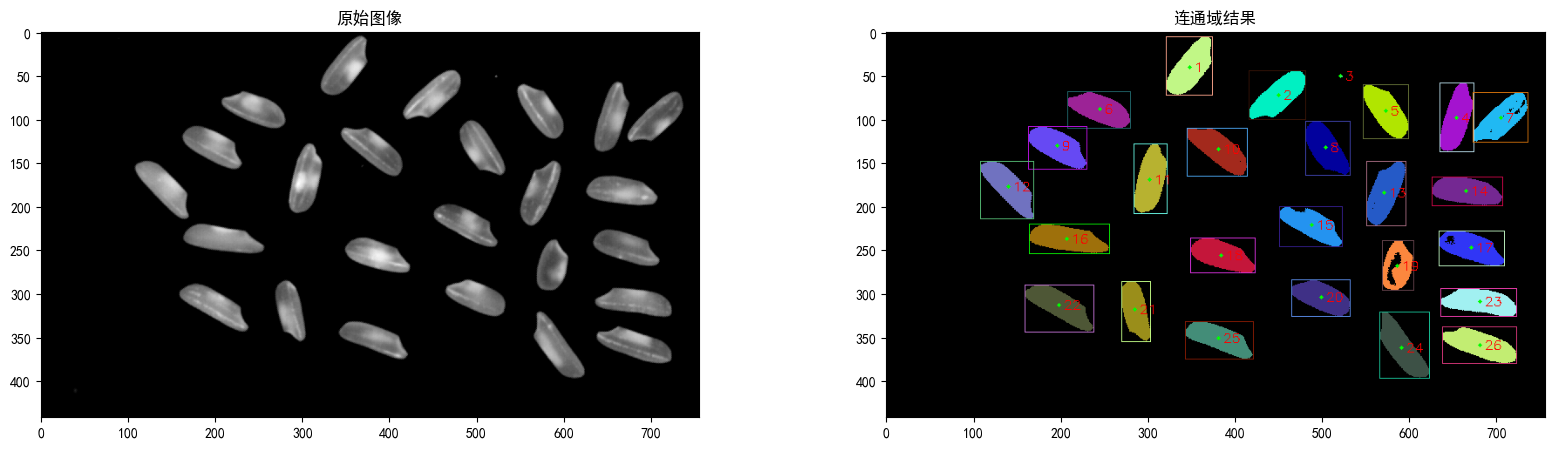

In [51]:
# 展示结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('原始图像')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('连通域结果')
plt.imshow(result[:, :, [2, 1, 0]])